In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import pandas as pd

In [2]:
df=pd.read_csv("heart2.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


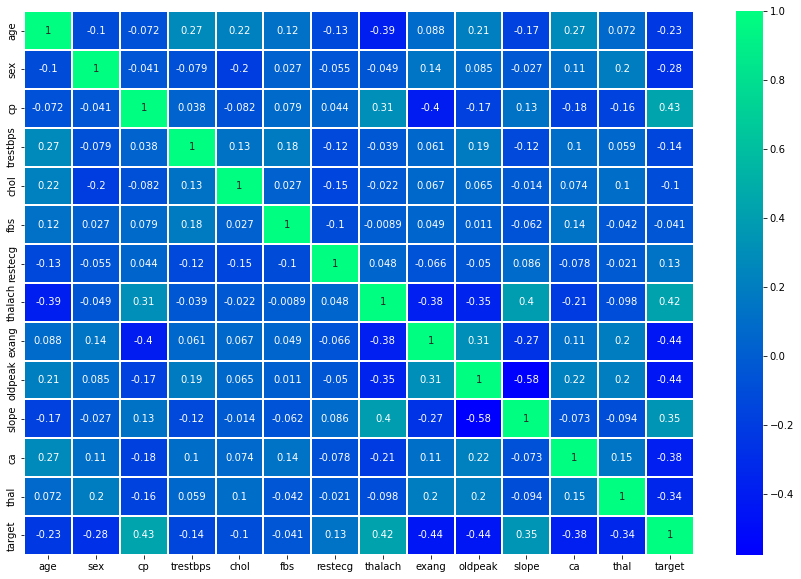

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

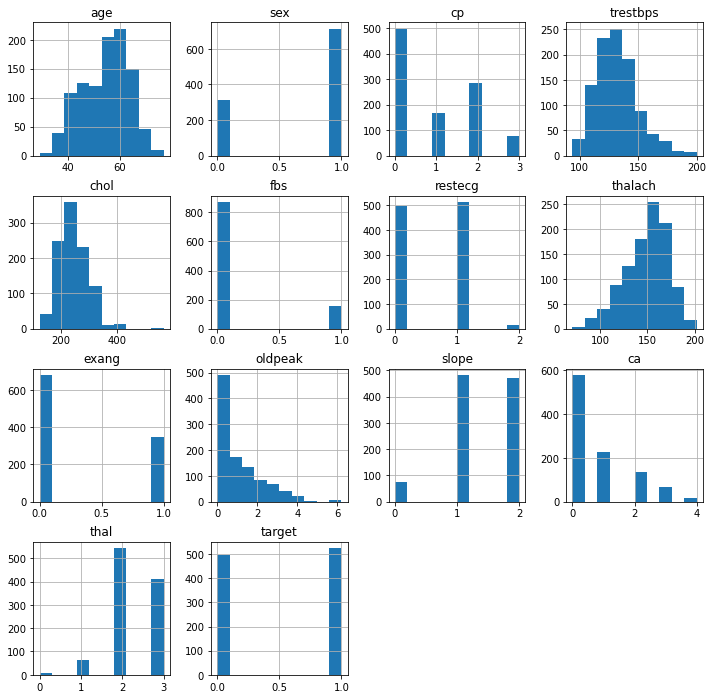

In [5]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [6]:
X=df.iloc[:,0:13].values
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=40)

Testing Accuracy for Logistic Regression: 0.8436578171091446
Testing Sensitivity for Logistic Regression: 0.87248322147651
Testing Specificity for Logistic Regression: 0.8210526315789474
Testing Precision for Logistic Regression: 0.7926829268292683


C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


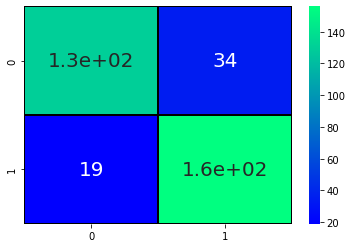

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       164
           1       0.82      0.89      0.85       175

    accuracy                           0.84       339
   macro avg       0.85      0.84      0.84       339
weighted avg       0.85      0.84      0.84       339



              precision    recall  f1-score   support

           0       0.93      0.89      0.91       164
           1       0.90      0.94      0.92       175

    accuracy                           0.91       339
   macro avg       0.92      0.91      0.91       339
weighted avg       0.92      0.91      0.91       339

Testing Accuracy for Decision Tree: 0.9144542772861357
Testing Sensitivity for Decision Tree: 0.9299363057324841
Testing Specificity for Decision Tree: 0.9010989010989011
Testing Precision for Decision Tree: 0.8902439024390244


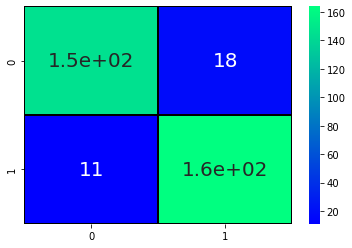

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

98.23
Testing Accuracy for Random Forest: 0.9823008849557522
Testing Sensitivity for Random Forest: 0.9647058823529412
Testing Specificity for Random Forest: 1.0
Testing Precision for Random Forest: 1.0


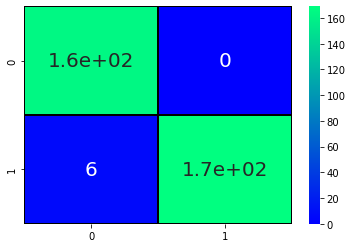

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for SVM: 0.831858407079646
Testing Sensitivity for Random Forest: 0.8543046357615894
Testing Specificity for Random Forest: 0.8138297872340425
Testing Precision for Random Forest: 0.7865853658536586


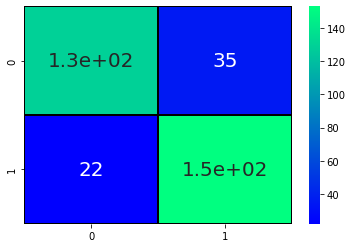

In [12]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
  print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
  print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
from sklearn.neighbors import KNeighborsClassifier


Minimum error:- 0.0 at K = 1


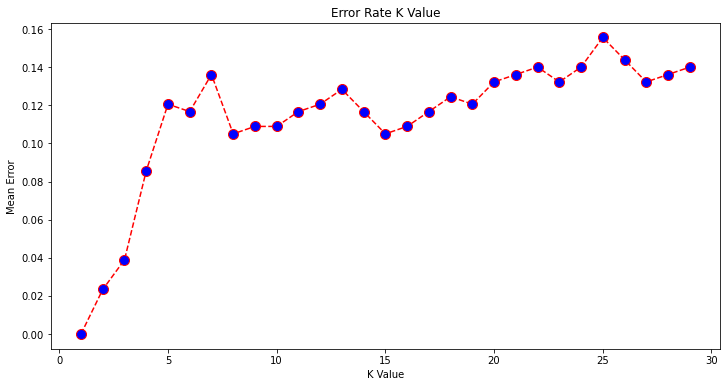

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [15]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[100  23]
 [ 12 122]]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8638132295719845

In [19]:
from sklearn import model_selection

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

C:\Users\Dell\AppData\Local\Temp/ipykernel_14080/74170921.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['target'], 1))


In [20]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
None


C:\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=2268, batch_size=8, verbose = 1)

Epoch 1/2268
103/103 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.5366
Epoch 2/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6171
Epoch 3/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6512
Epoch 4/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6951
Epoch 5/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7341
Epoch 6/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7268
Epoch 7/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7463
Epoch 8/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7402
Epoch 9/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7573
Epoch 10/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.468

103/103 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8439
Epoch 160/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8402
Epoch 161/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8366
Epoch 162/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8402
Epoch 163/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8512
Epoch 164/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8390
Epoch 165/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8366
Epoch 166/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8354
Epoch 167/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8402
Epoch 168/2268
103/103 [==============================] - 0s 2ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8659
Epoch 316/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8598
Epoch 317/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8549
Epoch 318/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8573
Epoch 319/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8524
Epoch 320/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8476
Epoch 321/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8451
Epoch 322/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8634
Epoch 323/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8549
Epoch 324/2268
103/103 [==============================] - 0s 3ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8537
Epoch 472/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8756
Epoch 473/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8707
Epoch 474/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8671
Epoch 475/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8683
Epoch 476/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8610
Epoch 477/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8659
Epoch 478/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8585
Epoch 479/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8573
Epoch 480/2268
103/103 [==============================] - 0s 1ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8439
Epoch 628/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8537
Epoch 629/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8707
Epoch 630/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8646
Epoch 631/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8720
Epoch 632/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8720
Epoch 633/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8622
Epoch 634/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8634
Epoch 635/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8659
Epoch 636/2268
103/103 [==============================] - 0s 1ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8720
Epoch 784/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8732
Epoch 785/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.8744
Epoch 786/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8732
Epoch 787/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8671
Epoch 788/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8732
Epoch 789/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8768
Epoch 790/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8695
Epoch 791/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8634
Epoch 792/2268
103/103 [==============================] - 0s 1ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.8659
Epoch 940/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8671
Epoch 941/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8646
Epoch 942/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8793
Epoch 943/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8659
Epoch 944/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8756
Epoch 945/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8744
Epoch 946/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8695
Epoch 947/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8671
Epoch 948/2268
103/103 [==============================] - 0s 1ms/step - loss: 0

103/103 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8537
Epoch 1096/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8805
Epoch 1097/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8683
Epoch 1098/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.8683
Epoch 1099/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8671
Epoch 1100/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8829
Epoch 1101/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8671
Epoch 1102/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8695
Epoch 1103/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.8829
Epoch 1104/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8561
Epoch 1252/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8695
Epoch 1253/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8756
Epoch 1254/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8854
Epoch 1255/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8854
Epoch 1256/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8756
Epoch 1257/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8720
Epoch 1258/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8756
Epoch 1259/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8768
Epoch 1260/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.8829
Epoch 1408/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8805
Epoch 1409/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8793
Epoch 1410/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8756
Epoch 1411/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8720
Epoch 1412/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8768
Epoch 1413/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8695
Epoch 1414/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8841
Epoch 1415/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.8744
Epoch 1416/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8878
Epoch 1564/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8829
Epoch 1565/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8793
Epoch 1566/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8854
Epoch 1567/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8683
Epoch 1568/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8805
Epoch 1569/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8768
Epoch 1570/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8524
Epoch 1571/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8732
Epoch 1572/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8902
Epoch 1720/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8915
Epoch 1721/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8890
Epoch 1722/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8927
Epoch 1723/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8951
Epoch 1724/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8939
Epoch 1725/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8939
Epoch 1726/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8829
Epoch 1727/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8829
Epoch 1728/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.8841
Epoch 1876/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8829
Epoch 1877/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.8976
Epoch 1878/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8866
Epoch 1879/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8671
Epoch 1880/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.8817
Epoch 1881/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8829
Epoch 1882/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8951
Epoch 1883/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.8622
Epoch 1884/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8902
Epoch 2032/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8927
Epoch 2033/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.8902
Epoch 2034/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2628 - accuracy: 0.8951
Epoch 2035/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8780
Epoch 2036/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8976
Epoch 2037/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9000
Epoch 2038/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8805
Epoch 2039/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.8866
Epoch 2040/2268
103/103 [==============================] - 0s 1ms/step 

103/103 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.8902
Epoch 2188/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8915
Epoch 2189/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8939
Epoch 2190/2268
103/103 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8829
Epoch 2191/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8890
Epoch 2192/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.8939
Epoch 2193/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2538 - accuracy: 0.8963
Epoch 2194/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8939
Epoch 2195/2268
103/103 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8878
Epoch 2196/2268
103/103 [==============================] - 0s 1ms/step 

In [23]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 2ms/step
Results for Categorical Model
0.8731707317073171
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       103
           1       0.82      0.95      0.88       102

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



In [24]:
import numpy as np 
input=[58,1,2,112,230,0,0,165,0,2.5,1,1,3]
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


In [1]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=tree_model.predict(newarr)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

NameError: name 'pd' is not defined

In [26]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=tree_model.predict(newarr)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

[[ 1.  1.  1.  1. 11.  1. 11.  1.  1.  1.  1.  1.  1.]]
The patient seems to be have heart disease:(


In [27]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=model.predict(newarr)
print(pre1)
pre1.reshape(2,1)
if(pre1[0][0]>.50):
    print("The patient seems to be Normal:)")
else:
    print("The patient seems to be have heart disease:(")

[[ 1.  1.  1.  1. 11.  1. 11.  1.  1.  1.  1.  1.  1.]]
1/1 [==============================] - 0s 28ms/step
[[0.02071252 0.9792875 ]]
The patient seems to be have heart disease:(


In [28]:
df=[1,1,1,1,1,1,1,1,1,1,1,1,1]
rr= np.array(df, dtype=np.float32)
newarr = rr.reshape(1,13)
print(newarr)
pre1=model.predict(newarr)
print(pre1)
pre1.reshape(2,1)
if(pre1[0][0]>.50):
    print("The patient seems to be Normal:)")
else:
    print("The patient seems to be have heart disease:(")

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
1/1 [==============================] - 0s 19ms/step
[[0.19540672 0.8045933 ]]
The patient seems to be have heart disease:(
